스팸 데이터 개수 : 76(read) -> 1304(spilt) -> 1279(drop)
스팸 데이터 최소 길이 53
스팸 데이터 최대 길이 150
----------------------------------------------------
일반 데이터 개수 : 2000(read) -> 2621(spilt) -> 2206(drop)
일반 데이터 최소 길이 50
일반 데이터 최대 길이 150
----------------------------------------------------
데이터 총 개수 : 3485
훈련용 데이터 개수 : 2613
테스트용 데이터 개수 : 872
----------------------------------------------------
   label  count
0      0   1683
1      1    930
----------------------------------------------------
스팸 단어 빈도
[('네', 1088), ('을', 973), ('본인', 858), ('있다', 831), ('되다', 810), ('를', 653), ('지금', 575), ('거', 551), ('예', 423), ('저희', 415), ('으로', 408), ('제', 396), ('아니다', 373), ('그렇다', 357), ('로', 353), ('요', 351), ('은', 343), ('통장', 342), ('에서', 303), ('받다', 294)]
----------------------------------------------------
일상 단어 빈도
[('나', 750), ('도', 613), ('그렇다', 589), ('안', 584), ('아니다', 504), ('먹다', 495), ('내', 472), ('아', 458), ('보다', 439), ('있다', 410), ('은', 399), ('같다', 371), ('가다', 357), ('다', 340), ('진짜', 335), ('근

C:\Users\YH\anaconda3\envs\tensorflow\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


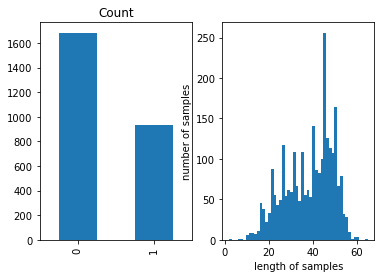

전체 샘플 중 길이가 60 이하인 샘플의 비율: 99.88518943742825
Epoch 1/15
8/9 [=========================>....] - ETA: 0s - loss: 0.6914 - acc: 0.6094
Epoch 00001: val_acc improved from -inf to 0.85277, saving model to BiLSTM_module_ver1.0.h5
9/9 [==============================] - 2s 199ms/step - loss: 0.6863 - acc: 0.6105 - val_loss: 0.3590 - val_acc: 0.8528
Epoch 2/15
8/9 [=========================>....] - ETA: 0s - loss: 0.1389 - acc: 0.9717
Epoch 00002: val_acc improved from 0.85277 to 0.98662, saving model to BiLSTM_module_ver1.0.h5
9/9 [==============================] - 1s 141ms/step - loss: 0.1371 - acc: 0.9718 - val_loss: 0.0696 - val_acc: 0.9866
Epoch 3/15
8/9 [=========================>....] - ETA: 0s - loss: 0.0194 - acc: 0.9980
Epoch 00003: val_acc did not improve from 0.98662
9/9 [==============================] - 1s 120ms/step - loss: 0.0192 - acc: 0.9981 - val_loss: 0.0447 - val_acc: 0.9866
Epoch 4/15
8/9 [=========================>....] - ETA: 0s - loss: 0.0073 - acc: 0.9995
Epoch 00004: 

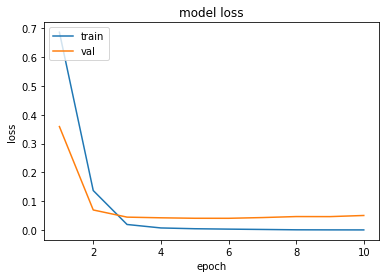

In [2]:
import os
import json
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from collections import Counter
import pickle

file_name = "BiLSTM_module_ver1.0"

spam_temp = []
ham_temp = []
spam_X = []
ham_X = []
train_X = []
test_X = []

ham_cnt = 2000 # ham Data Count
max_data = 150
min_data = 50

# 피싱 대화 데이터 가져오기
path = 'fraudDataset/spamData/'
path1 = os.listdir(path)
for a in path1:
    path2 = path+a
    with open(path2, 'r', encoding='utf-8') as f:
        contents = f.read()
        spam_temp.append(contents)
                
for t in spam_temp:
    x = [t[i:i+max_data] for i in range(0, len(t), max_data)] # 텍스트 파일 중 150 길이로 데이터 길이 제한
    spam_X.extend(x)
    

spam_df = pd.DataFrame(spam_X, columns=['text'])
spam_df.drop(spam_df[spam_df['text'].str.len() < min_data].index, inplace=True) # 길이가 min_data 이하인 데이터 삭제
# spam_df['text'].nunique() # 중복 확인
spam_df.drop_duplicates(subset=['text'], inplace=True) # 중복 제거
spam_df['label'] = 1

print("스팸 데이터 개수 : {}(read) -> {}(spilt) -> {}(drop)".format(len(spam_temp),len(spam_X),len(spam_df)))
print('스팸 데이터 최소 길이',len(min(spam_df['text'], key=len)))
print('스팸 데이터 최대 길이',len(max(spam_df['text'], key=len)))
print('----------------------------------------------------')

# 일상 대화 데이터 가져오기
path = 'fraudDataset/hamData/'
path1 = os.listdir(path)
for a in path1:
    path2 = os.listdir(path+a)
    for b in path2:
        path3 = path+a+'/'+b
        with open(path3, 'r', encoding='utf-8') as f:
            contents = f.read()
            json_data = json.loads(contents)
            data = ''
            data = json_data['data']
            for i in range(len(data)):                
                sentence = ''
                dialogue = data[i]['body']['dialogue']
                for j in range(len(dialogue)):
                    utterance = dialogue[j]['utterance']
                    sentence += utterance+' '
                    
                if len(ham_temp) == ham_cnt:
                    break
                    
                ham_temp.append(sentence)
                            
for t in ham_temp:
    x = [t[i:i+max_data] for i in range(0, len(t), max_data)] # 텍스트 파일 중 150 길이로 데이터 길이 제한
    ham_X.extend(x)
    
ham_df = pd.DataFrame(ham_X, columns=['text'])
ham_df.drop(ham_df[ham_df['text'].str.len() < min_data].index, inplace=True) # 길이가 min_data 이하인 데이터 삭제
# ham_df['text'].nunique() # 중복 확인
ham_df.drop_duplicates(subset=['text'], inplace=True) # 중복 제거
ham_df['label'] = 0

print("일반 데이터 개수 : {}(read) -> {}(spilt) -> {}(drop)".format(len(ham_temp),len(ham_X),len(ham_df)))
print('일반 데이터 최소 길이',len(min(ham_df['text'], key=len)))
print('일반 데이터 최대 길이',len(max(ham_df['text'], key=len)))
print('----------------------------------------------------')

total_df = pd.concat([spam_df, ham_df], ignore_index=True)
#print('Null 데이터 확인 : ',total_df.isnull().values.any())

train_data, test_data = train_test_split(total_df, test_size = 0.25, random_state = 42) # 훈련용 테스트 데이터 나누기
print('데이터 총 개수 :',len(total_df))
print('훈련용 데이터 개수 :', len(train_data))
print('테스트용 데이터 개수 :', len(test_data))
print('----------------------------------------------------')

plt.subplot(121)
train_data['label'].value_counts().plot(kind = 'bar', title='Count')
print(train_data.groupby('label').size().reset_index(name = 'count'))
print('----------------------------------------------------')


# 한글과 공백을 제외하고 모두 제거
pd.set_option('mode.chained_assignment', None) # 경고 메시지 끄기
train_data['text'] = train_data['text'].str.replace("#@(.+?)#|[^가-힣 ]","",regex=True)
train_data.replace('', np.nan, inplace=True)
#print(train_data.isnull().sum()) # null 데이터 확인
test_data['text'] = test_data['text'].str.replace("#@(.+?)#|[^가-힣 ]","",regex=True)
test_data.replace('', np.nan, inplace=True)
#print(test_data.isnull().sum())

okt = Okt()
stopwords = ['하다','이','가','에','는', '없다']

X_train = []
for sentence in train_data['text']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 처리
    X_train.append(temp_X)

X_test = []
for sentence in test_data['text']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 처리
    X_test.append(temp_X)
    
    
train_data['tokenized'] = X_train
test_data['tokenized'] = X_test

spam_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)
ham_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)

spam_word_count = Counter(spam_words)
print('스팸 단어 빈도')
print(spam_word_count.most_common(20))
print('----------------------------------------------------')

ham_word_count = Counter(ham_words)
print('일상 단어 빈도')
print(ham_word_count.most_common(20))
print('----------------------------------------------------')

X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test = test_data['tokenized'].values
y_test = test_data['label'].values

# 한글은 형태소 분석기 사용해야됨 KoNPLY
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
threshold = 2 # 등장 횟수가 threshold인 단어는 제거
word_to_index = tokenizer.word_index
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value
        
print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

#vocab_size = total_cnt - rare_cnt + 1
#vocab_size = total_cnt + 1 # predict Error 해결

vocab_size = total_cnt - rare_cnt + 2
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

with open(file_name+"_tokenizer.pickle", "wb") as f:
    pickle.dump(tokenizer, f, protocol=pickle.HIGHEST_PROTOCOL)

# 빈 샘플들을 제거
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
print("빈 샘플 개수 :",len(drop_train))
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

print('최대 길이 :',max(len(l) for l in X_train))
print('평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.subplot(122)
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

max_len = 60 # 최대 길이 (그래프를 보고 판단)
below_threshold_len(max_len, X_train)

X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(vocab_size, max_len))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint(file_name+'.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=256, validation_split=0.2)

print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# 변수 파일 저장
d = {'max_data':max_data, 'min_data':min_data, 'max_len':max_len}
json_var = json.dumps(d)
with open(file_name+'_variable.json', 'w') as f:
    f.write(json_var)